In [9]:
import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
#os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

# Section 1: Construct Trend, Seasonality, and Residual Components

In [10]:
time = np.arange(1,75)
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74])

In [11]:
trend = time * 2.75
trend

array([  2.75,   5.5 ,   8.25,  11.  ,  13.75,  16.5 ,  19.25,  22.  ,
        24.75,  27.5 ,  30.25,  33.  ,  35.75,  38.5 ,  41.25,  44.  ,
        46.75,  49.5 ,  52.25,  55.  ,  57.75,  60.5 ,  63.25,  66.  ,
        68.75,  71.5 ,  74.25,  77.  ,  79.75,  82.5 ,  85.25,  88.  ,
        90.75,  93.5 ,  96.25,  99.  , 101.75, 104.5 , 107.25, 110.  ,
       112.75, 115.5 , 118.25, 121.  , 123.75, 126.5 , 129.25, 132.  ,
       134.75, 137.5 , 140.25, 143.  , 145.75, 148.5 , 151.25, 154.  ,
       156.75, 159.5 , 162.25, 165.  , 167.75, 170.5 , 173.25, 176.  ,
       178.75, 181.5 , 184.25, 187.  , 189.75, 192.5 , 195.25, 198.  ,
       200.75, 203.5 ])

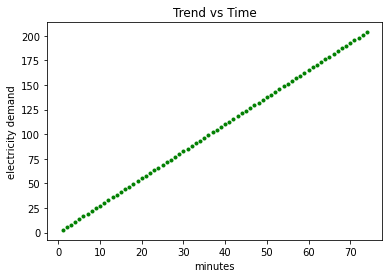

In [12]:
plt.plot(time, trend, 'g.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [13]:
seasonal = 10 + np.sin(time) * 10
seasonal

array([1.84147098e+01, 1.90929743e+01, 1.14112001e+01, 2.43197505e+00,
       4.10757253e-01, 7.20584502e+00, 1.65698660e+01, 1.98935825e+01,
       1.41211849e+01, 4.55978889e+00, 9.79344930e-05, 4.63427082e+00,
       1.42016704e+01, 1.99060736e+01, 1.65028784e+01, 7.12096683e+00,
       3.86025081e-01, 2.49012753e+00, 1.14987721e+01, 1.91294525e+01,
       1.83665564e+01, 9.91148691e+00, 1.53779596e+00, 9.44216380e-01,
       8.67648250e+00, 1.76255845e+01, 1.95637593e+01, 1.27090579e+01,
       3.36366116e+00, 1.19683759e-01, 5.95962355e+00, 1.55142668e+01,
       1.99991186e+01, 1.52908269e+01, 5.71817331e+00, 8.22114656e-02,
       3.56461867e+00, 1.29636858e+01, 1.96379539e+01, 1.74511316e+01,
       8.41377331e+00, 8.34784521e-01, 1.68225257e+00, 1.01770193e+01,
       1.85090352e+01, 1.90178835e+01, 1.12357312e+01, 2.31745339e+00,
       4.62473472e-01, 7.37625146e+00, 1.67022918e+01, 1.98662759e+01,
       1.39592515e+01, 4.41210951e+00, 2.44826641e-03, 4.78448998e+00,
      

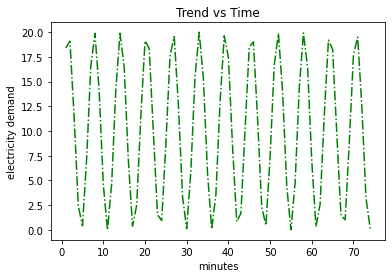

In [14]:
plt.plot(time, seasonal, 'g-.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [15]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))
residual

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

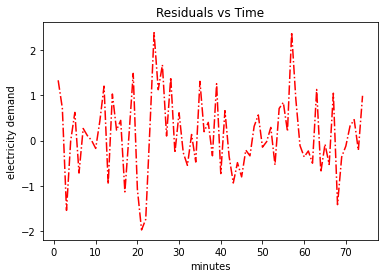

In [16]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

# Section 2: Aggregate Trend, Seasonality, and Residual Components

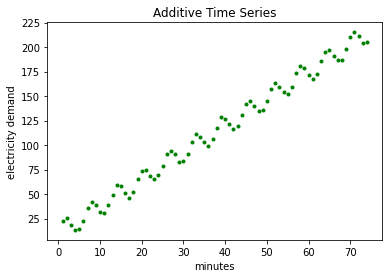

In [17]:
additive = trend + seasonal + residual
plt.plot(time, additive, 'g.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

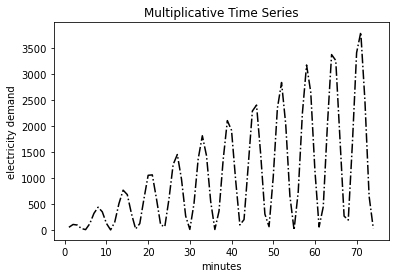

In [18]:
ignored_residual = np.ones_like(residual)
#print(ignored_residual)
multiplicative = trend * seasonal * ignored_residual
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

# Exercise #1

In [19]:
path_to_file = "./"

In [20]:
path_to_file = "./"

time = np.arange(0, 50)
dataset_A = np.load(path_to_file + "dataset_A.npy")
dataset_B = np.load(path_to_file + "dataset_B.npy")
type(dataset_B)

numpy.ndarray

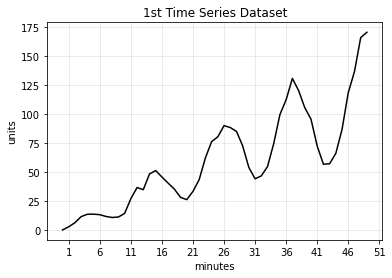

In [52]:
plt.plot(time, dataset_A, 'k-')
plt.title("1st Time Series Dataset")
plt.xlabel("minutes")
plt.xticks(np.linspace(1,51,11, dtype='int'))
plt.ylabel("units")
plt.grid(alpha=0.3);

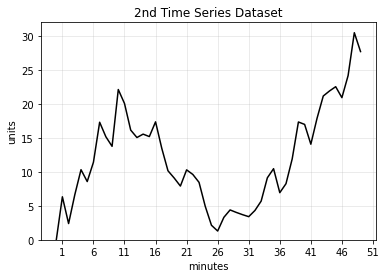

In [53]:
plt.plot(time, dataset_B, 'k-')
plt.title("2nd Time Series Dataset")
plt.xlabel("minutes")
plt.xticks(np.linspace(1,51,11, dtype='int'))
plt.ylabel("units")
plt.ylim(0, 32)
plt.grid(alpha=0.3);

# Section 3: Time Series Decomposition

# Additive Decomposition

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

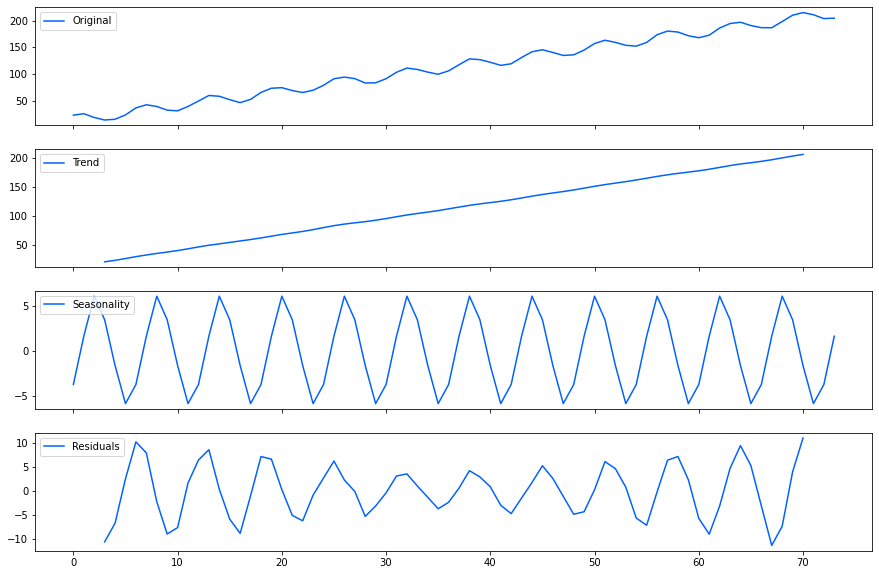

In [55]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

# Multiplicative Decomposition

In [56]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

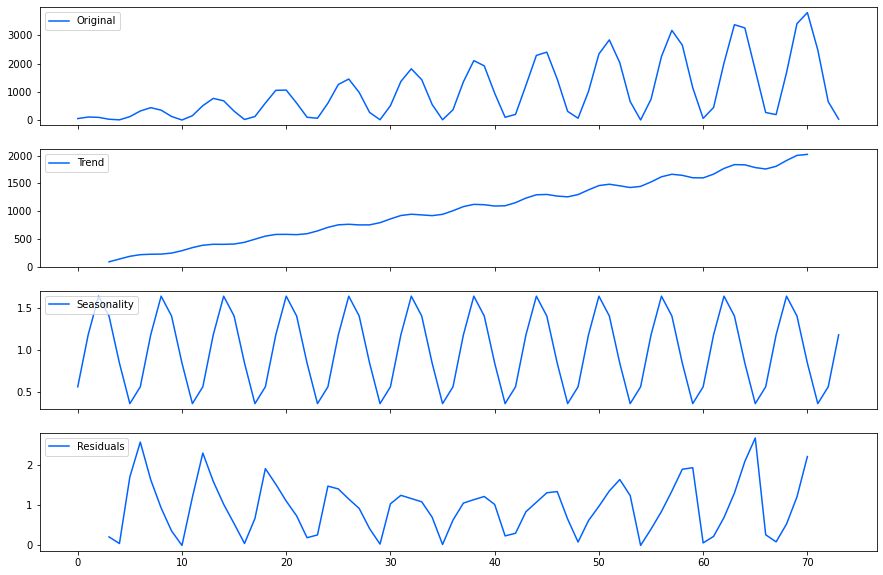

In [59]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

# Exercise #2

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

### BEGIN SOLUTION
ss_decomposition_multi = seasonal_decompose(x=dataset_A, 
                                            model='multiplicative', 
                                            period=8)

estimated_trend_multi = ss_decomposition_multi.trend
estimated_seasonal_multi = ss_decomposition_multi.seasonal
estimated_residual_multi = ss_decomposition_multi.resid


ss_decomposition_add = seasonal_decompose(x=dataset_B, 
                                          model='additive', 
                                          period=3)

estimated_trend_add = ss_decomposition_add.trend
estimated_seasonal_add = ss_decomposition_add.seasonal
estimated_residual_add = ss_decomposition_add.resid

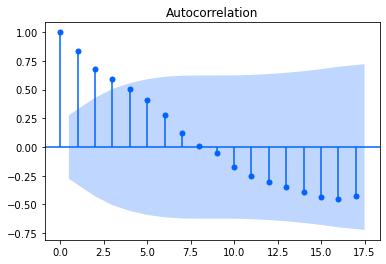

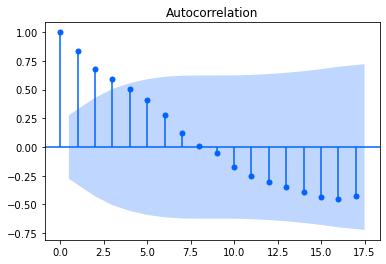

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset_B)

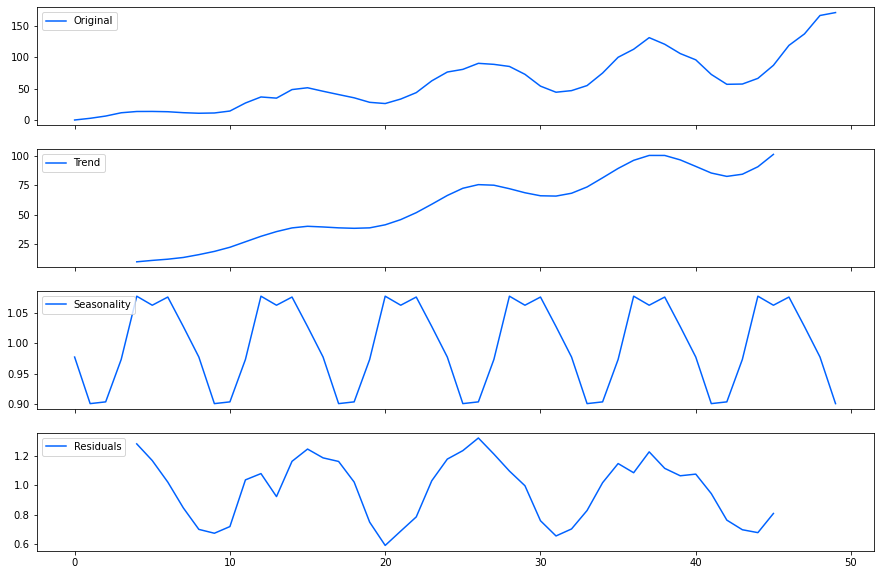

In [63]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataset_A, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_multi, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_multi, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_multi, label='Residuals')
axes[3].legend(loc='upper left');

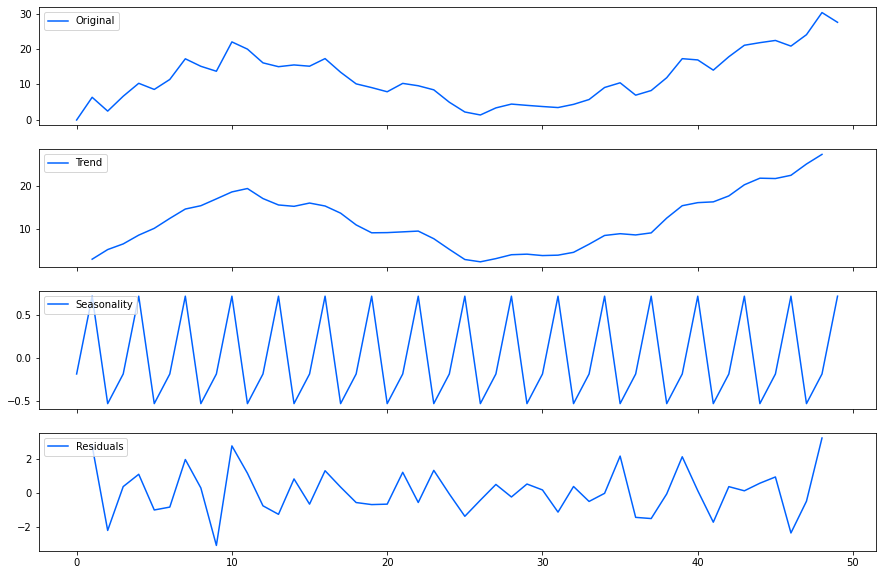

In [64]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataset_B, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend_add, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal_add, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual_add, label='Residuals')
axes[3].legend(loc='upper left');
### END BEGIN SOLUTION